In [1]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from collections import Counter

# from sklearn.datasets import load_boston
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_240065row_specialDeal_unitPrice_outlier_5percent_2024.csv')
plt.rcParams['font.family'] = 'Heiti TC'

In [3]:
df.shape

(240065, 57)

In [4]:
df.describe()

,建築完成年月,建物移轉總面積平方公尺,總價元,單價元平方公尺,緯度,經度,bad_count,good_count,陽台有無,是否含額外土地,...,交易年份,建築完成年,交易年_民國,屋齡,good_count_0_500,good_count_500_1000,good_count_1000_1500,bad_count_0_500,bad_count_500_1000,bad_count_1000_1500
count,2.097770e+05,240065.000000,2.400650e+05,240065.000000,240065.000000,240065.000000,240065.000000,240065.000000,240065.000000,240065.000000,...,240065.000000,240065.000000,240065.000000,240065.000000,240065.000000,240065.000000,240065.000000,240065.000000,240065.000000,240065.000000
mean,9.418681e+05,163.897913,9.046614e+06,55607.446350,23.040440,120.233721,4.917414,0.905388,0.753013,0.307529,...,2018.628113,82.242414,107.628113,25.385700,1.001912,2.613230,3.871510,5.426385,14.013346,22.101352
std,1.537890e+05,285.373059,1.400247e+07,23469.525176,0.096472,0.075541,6.584790,1.352758,0.431260,0.461471,...,3.464489,34.399317,3.464489,35.486362,1.369480,2.925681,4.414454,6.619271,13.940883,21.657400
min,0.000000e+00,0.860000,3.500000e+04,16550.000000,22.503404,120.054968,0.000000,0.000000,0.000000,0.000000,...,2012.000000,0.000000,101.000000,-7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.301190e+05,105.280000,4.680000e+06,38098.000000,22.985931,120.195481,1.000000,0.000000,1.000000,0.000000,...,2016.000000,76.000000,105.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,9.000000
50%,1.001107e+06,146.730000,7.350000e+06,51259.000000,23.012870,120.228099,4.000000,0.000000,1.000000,0.000000,...,2019.000000,92.000000,108.000000,15.000000,1.000000,2.000000,2.000000,4.000000,12.000000,17.000000
75%,1.071214e+06,188.420000,1.100000e+07,69703.000000,23.059308,120.260084,7.000000,1.000000,1.000000,1.000000,...,2021.000000,107.000000,110.000000,31.000000,1.000000,4.000000,6.000000,7.000000,17.000000,26.000000
max,1.130717e+06,57128.460000,2.100000e+09,121643.000000,35.676423,139.650027,100.000000,10.000000,1.000000,1.000000,...,2024.000000,113.000000,113.000000,113.000000,10.000000,18.000000,27.000000,101.000000,108.000000,156.000000


In [5]:
pd.set_option('display.max_rows', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240065 entries, 0 to 240064
Data columns (total 57 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   鄉鎮市區                  240065 non-null  object 
 1   土地位置建物門牌              240065 non-null  object 
 2   交易年月日                 240065 non-null  object 
 3   建築完成年月                209777 non-null  float64
 4   建物移轉總面積平方公尺           240065 non-null  float64
 5   有無管理組織                240065 non-null  object 
 6   總價元                   240065 non-null  int64  
 7   單價元平方公尺               240065 non-null  float64
 8   備註                    62036 non-null   object 
 9   編號                    240065 non-null  object 
 10  緯度                    240065 non-null  float64
 11  經度                    240065 non-null  float64
 12  bad_count             240065 non-null  float64
 13  good_count            240065 non-null  float64
 14  建築型態清整                240065 non-null  object 
 15  

In [6]:
print(df['有無管理組織'].unique())



# # 將 '有' 轉換為 1，'無' 轉換為 0，並處理 NaN 值
df['有無管理組織'] = df['有無管理組織'].map({'有': 1, '無': 0}).fillna(0)

# # 檢查轉換後的結果
print(df['有無管理組織'].head())


['有' '無']
0    1
1    0
2    0
3    1
4    1
Name: 有無管理組織, dtype: int64


In [7]:
# df.info()

In [7]:
df.isnull().sum()

鄉鎮市區                         0
土地位置建物門牌                     0
交易年月日                        0
建築完成年月                   30288
建物移轉總面積平方公尺                  0
有無管理組織                       0
總價元                          0
單價元平方公尺                      0
備註                      178029
編號                           0
緯度                           0
經度                           0
bad_count                    0
good_count                   0
建築型態清整                       0
陽台有無                         0
是否含額外土地                      0
建築型態_住商大樓                    0
建築型態_公寓                      0
建築型態_其他                      0
建築型態_透天厝                     0
房地總價元                        0
格局比例_房                       0
格局比例_廳                       0
格局比例_衛                       0
格局比例_隔間                      0
是否包含車位                       0
建材_磚石                        0
建材_鋼筋                        0
建材_鋼骨                        0
建材_竹木                        0
住                            0
商       

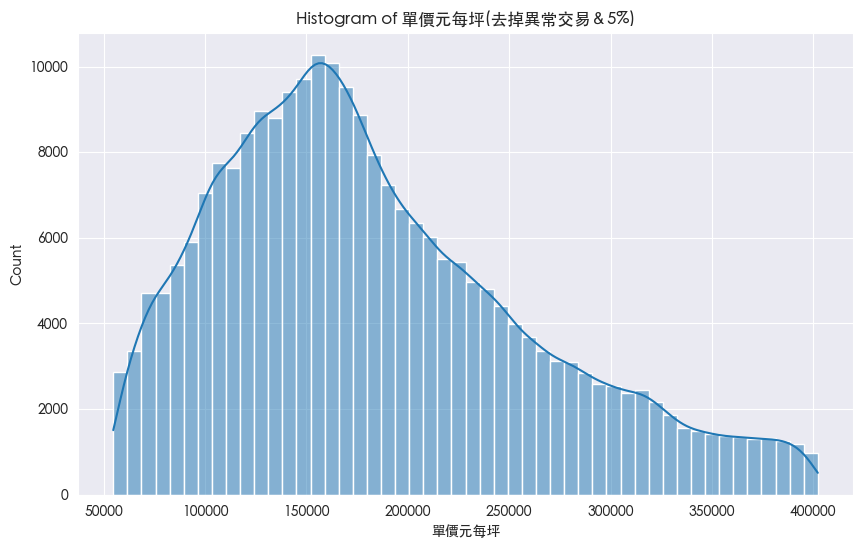

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['單價元每坪'], bins=50, kde=True)
plt.title('Histogram of 單價元每坪(去掉異常交易＆5%)')


# 儲存圖檔，指定輸出路徑和檔名
output_path = "/Users/debbie/house/output/out-specilDeal-5-percent-outlier_Histogram of 單價元每坪.png"
plt.savefig(output_path, dpi=300)
plt.show()

1. 處理異常值（outliers）：

    min 為 0，這可能是異常數據，應考慮刪除或補充這些數據。
    max 值高達 70,565,880，這可能也是極端值。可以使用四分位距數據（如 Q1 和 Q3）來計算並排除異常值：
    使用 IQR（Q3 - Q1），範圍外的數據可以被視為異常值，通常為低於 Q1 - 1.5*IQR 或高於 Q3 + 1.5*IQR 的數據。
2. 處理零值：

    如果 min 為 0 是無效數據，可以考慮將這些值濾除或使用平均值、中位數等進行填補。
3. 資料分佈檢查與轉換：

    檢查數據的偏態（skewness）。若數據呈現強烈的右偏分佈（偏態值 > 1），可以考慮對 y 進行對數變換（log transformation），如 log(y + 1)，以減少異常高值的影響，使數據分佈更加正態，從而提升模型的效果。
4. 標準化（Normalization）或正規化（Normalization）：

    若使用對數變換，對於 y 這樣的目標變數通常無需進行標準化。但在進行一些模型（如正則化模型）時，標準化有時能幫助收斂速度更快。

In [10]:
print(df['單價元每坪'].describe())

count    240065.000000
mean     183826.262034
std       77585.204283
min       54710.741750
25%      125943.796930
50%      169451.233315
75%      230423.131855
max      402125.604755
Name: 單價元每坪, dtype: float64


### 偏態值為 0.69

In [11]:
from scipy.stats import skew
# 計算 [單價元每坪] 欄位的偏態
skewness = skew(df['單價元每坪'].dropna())  # 避免 NaN 影響偏態計算
print(f"[單價元每坪] 欄位的偏態: {skewness}")

[單價元每坪] 欄位的偏態: 0.6935189386153267


In [12]:
df.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '緯度', '經度', 'bad_count', 'good_count', '建築型態清整',
       '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
       '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石',
       '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓', '移轉層次_屋頂',
       '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯', 'Region',
       '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)', '交易年份', '建築完成年', '交易年_民國', '屋齡',
       '屋齡區間', 'good_count_0_500', 'good_count_500_1000',
       'good_count_1000_1500', 'bad_count_0_500', 'bad_count_500_1000',
       'bad_count_1000_1500'],
      dtype='object')

## 分類欄位
- 建築型態：'建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝'
- 格局比例：'格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間'（佔比）
- 建材：'建材_磚石','建材_鋼筋', '建材_鋼骨', '建材_竹木'
- 土地用途：'住', '商', '工', '農'
- 移轉層次：'移轉層次_騎樓', '移轉層次_屋頂','移轉層次_一二樓'
- 屋齡：'屋齡區間'
- 好物設施：'good_count_0_500', 'good_count_500_1000','good_count_1000_1500', 'bad_count_0_500', 'bad_count_500_1000','bad_count_1000_1500'
## 有無欄位
- '有無管理組織'
- '陽台有無'
- '是否含額外土地'
- '是否包含車位'
- '有無電梯'
## 其他
- '交易年份
- ~'屋齡'~
- '房地總價元(坪)'
- '建物移轉總面積坪'

In [13]:
# 查看這些欄位的統計描述
print(df[['格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間']].describe())


              格局比例_房         格局比例_廳         格局比例_衛        格局比例_隔間
count  240065.000000  240065.000000  240065.000000  240065.000000
mean        0.371160       0.217450       0.282039       0.127781
std         0.071744       0.073130       0.078437       0.057062
min         0.000000       0.000000       0.000000       0.000000
25%         0.333333       0.181818       0.250000       0.090909
50%         0.375000       0.222222       0.272727       0.125000
75%         0.400000       0.250000       0.333333       0.142857
max         1.000000       1.000000       1.000000       1.000000


In [14]:
df['比例總和'] = df['格局比例_房'] + df['格局比例_廳'] + df['格局比例_衛'] + df['格局比例_隔間']
print(df['比例總和'].describe())


count    240065.000000
mean          0.998431
std           0.038644
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: 比例總和, dtype: float64


In [10]:
# 創建一個函數，根據 One-Hot 編碼欄位的值返回類別標籤
def get_building_type(row):
    if row['移轉層次_騎樓'] == 1:
        return '騎樓'
    elif row['移轉層次_屋頂'] == 1:
        return '屋頂'
    elif row['移轉層次_一二樓'] == 1:
        return '一二樓'
    else:
        return '未知'

# 應用函數，創建新的類別型欄位
df['移轉層次'] = df.apply(get_building_type, axis=1)



In [11]:
# 創建一個函數，根據 One-Hot 編碼欄位的值返回類別標籤
def get_building_type(row):
    if row['建築型態_住商大樓'] == 1:
        return '住商大樓'
    elif row['建築型態_公寓'] == 1:
        return '公寓'
    elif row['建築型態_透天厝'] == 1:
        return '透天厝'
    elif row['建築型態_其他'] == 1:
        return '其他'
    else:
        return '未知'

# 應用函數，創建新的類別型欄位
df['建築型態'] = df.apply(get_building_type, axis=1)



In [12]:
# 定義函數，根據 One-Hot 編碼欄位返回建材類別
def get_material_type(row):
    if row['建材_磚石'] == 1:
        return '磚石'
    elif row['建材_鋼筋'] == 1:
        return '鋼筋'
    elif row['建材_鋼骨'] == 1:
        return '鋼骨'
    elif row['建材_竹木'] == 1:
        return '竹木'
    else:
        return '未知'  # 處理可能的缺失值或異常值

# 應用函數，創建新的類別型欄位
df['建材種類'] = df.apply(get_material_type, axis=1)



In [13]:
# 定義函數，根據 One-Hot 編碼欄位返回土地用途類別
def get_land_use_type(row):
    if row['住'] == 1:
        return '住'
    elif row['商'] == 1:
        return '商'
    elif row['工'] == 1:
        return '工'
    elif row['農'] == 1:
        return '農'
    else:
        return '未知'  # 處理可能的缺失值或異常值

# 應用函數，創建新的類別型欄位
df['土地用途'] = df.apply(get_land_use_type, axis=1)




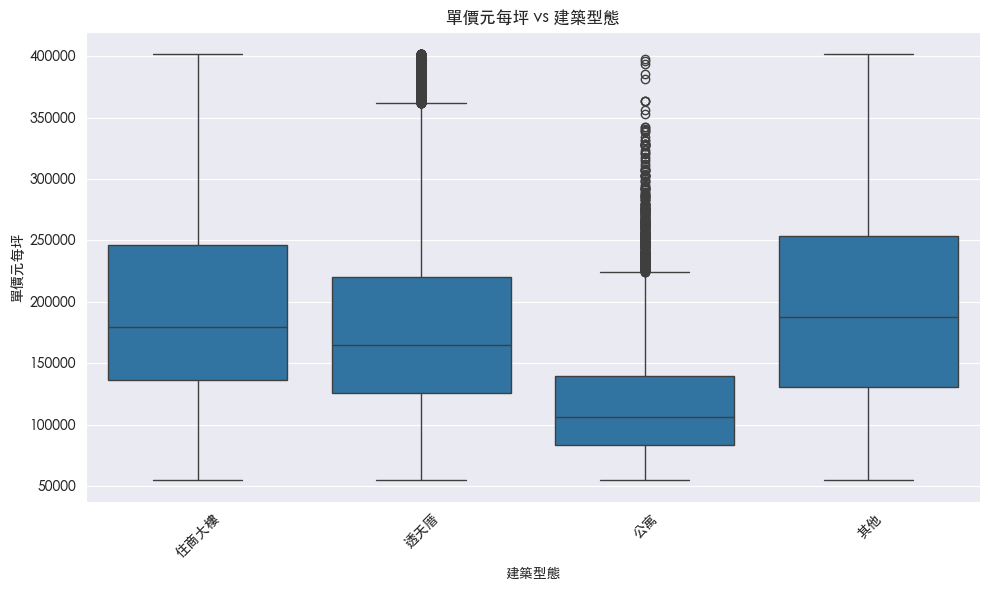

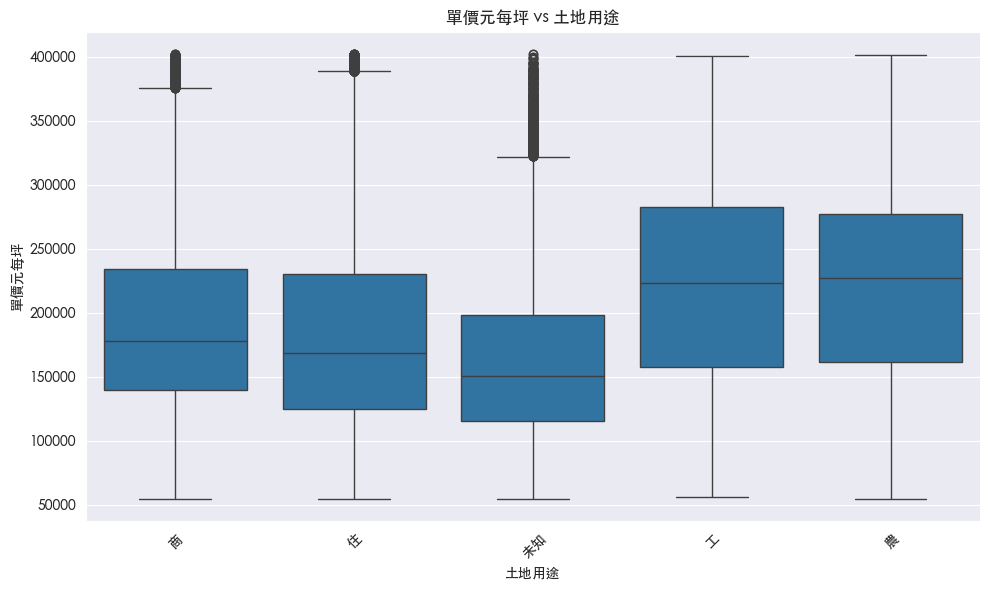

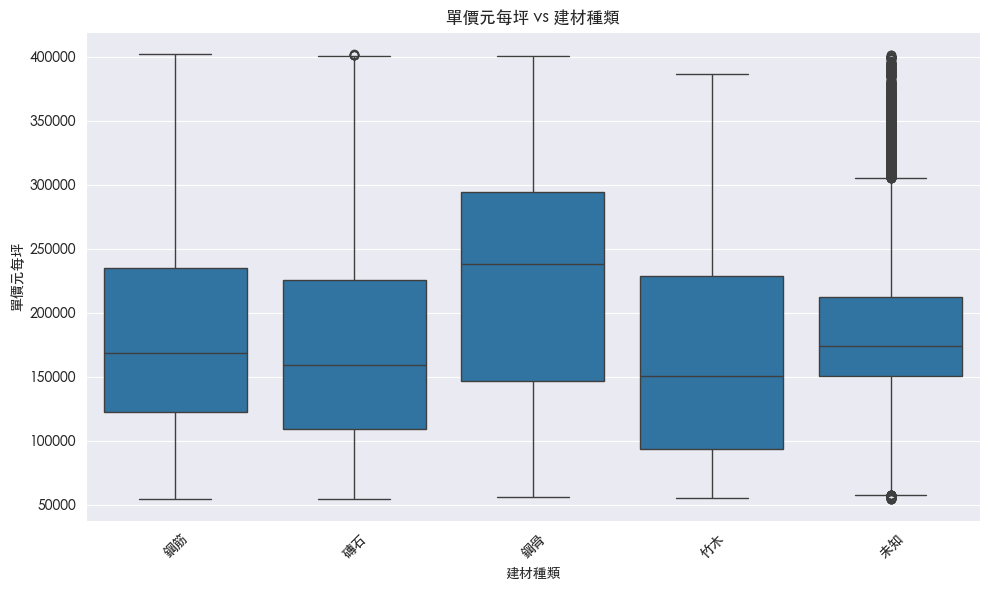

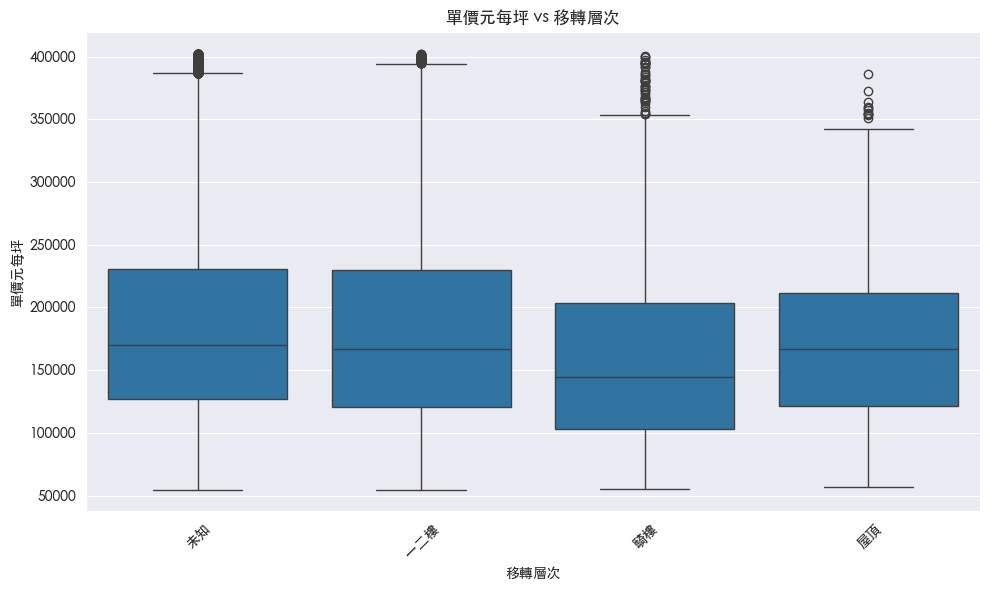

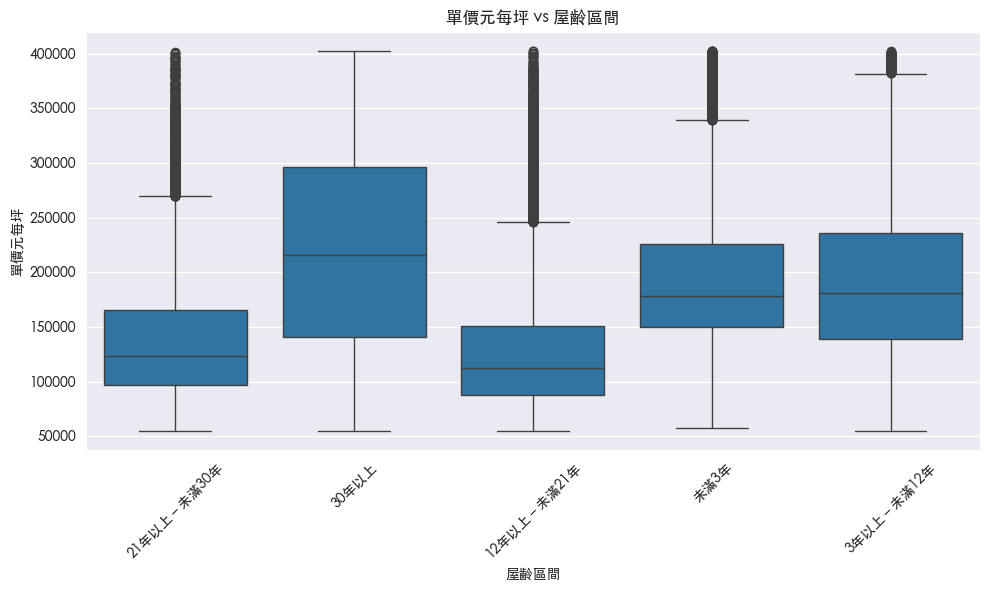

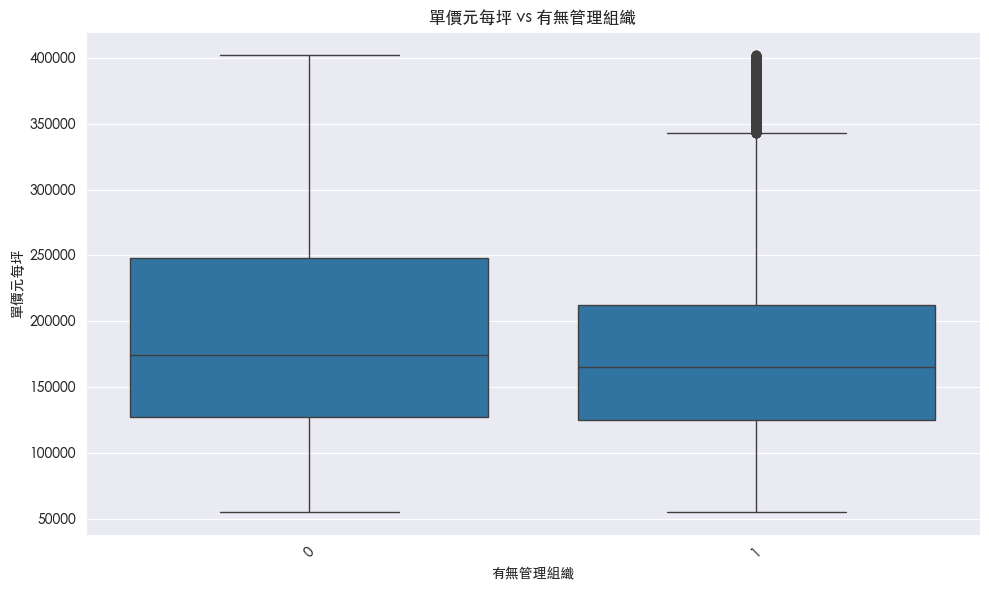

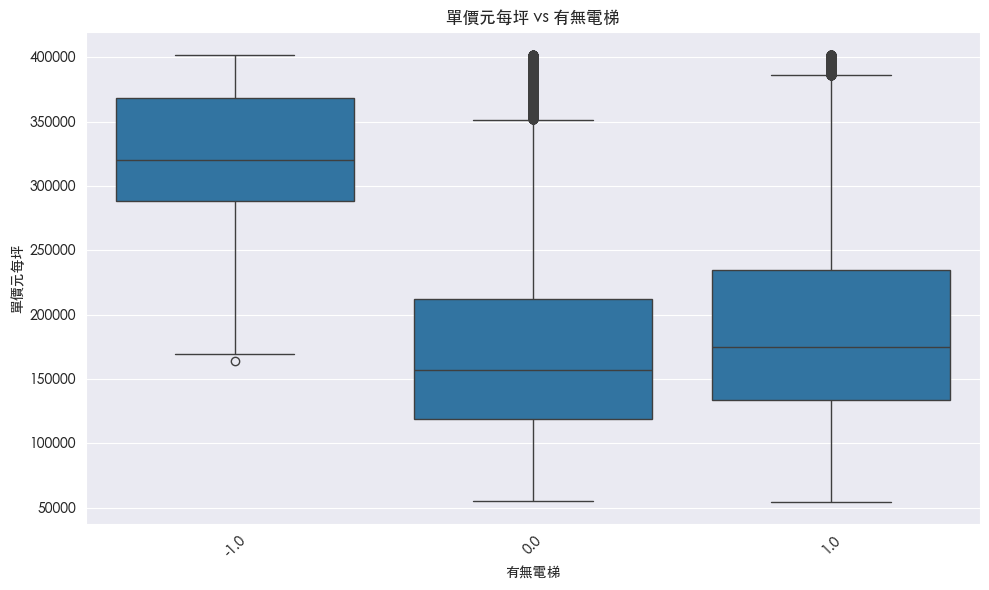

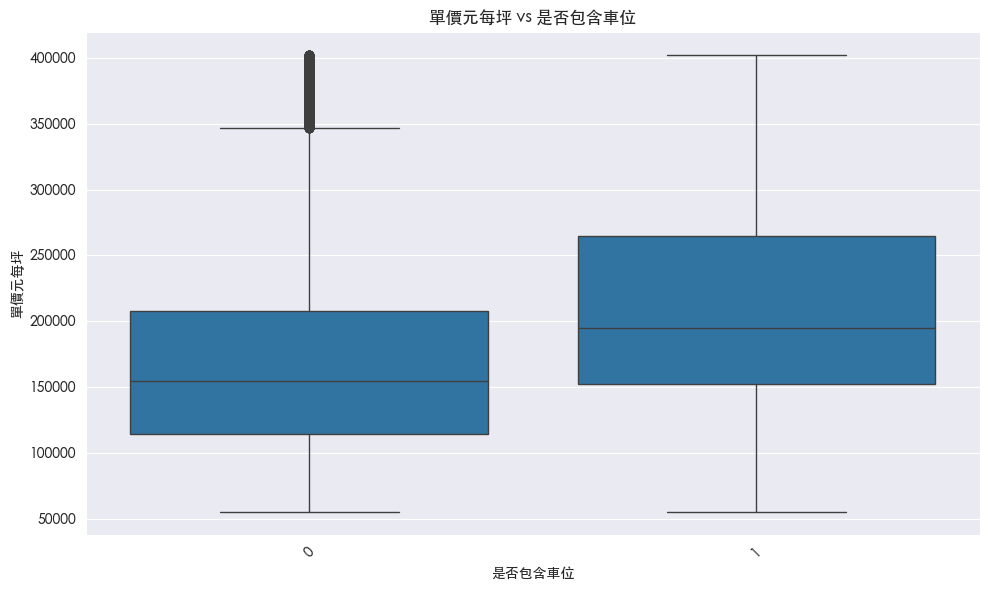

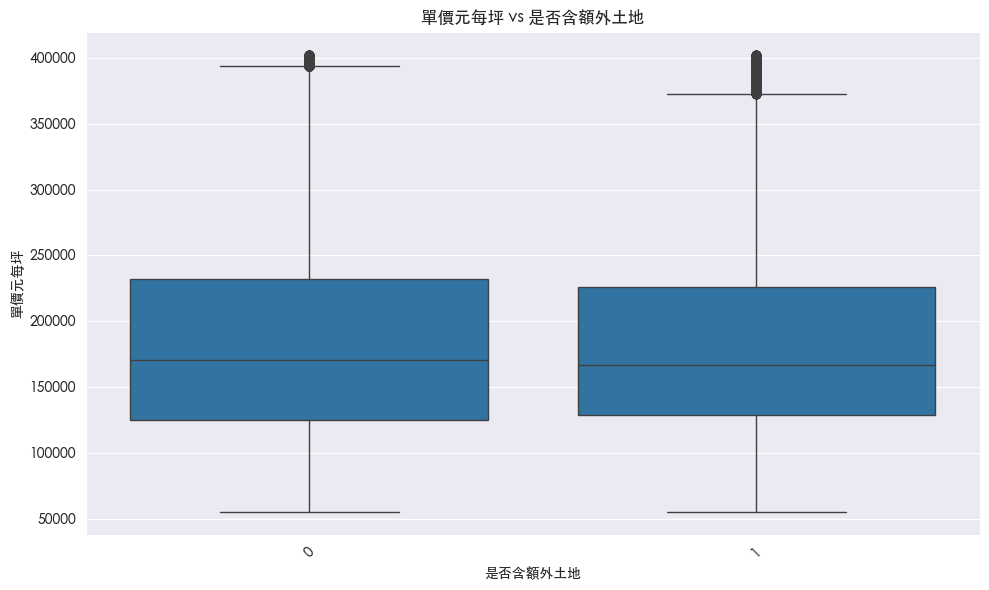

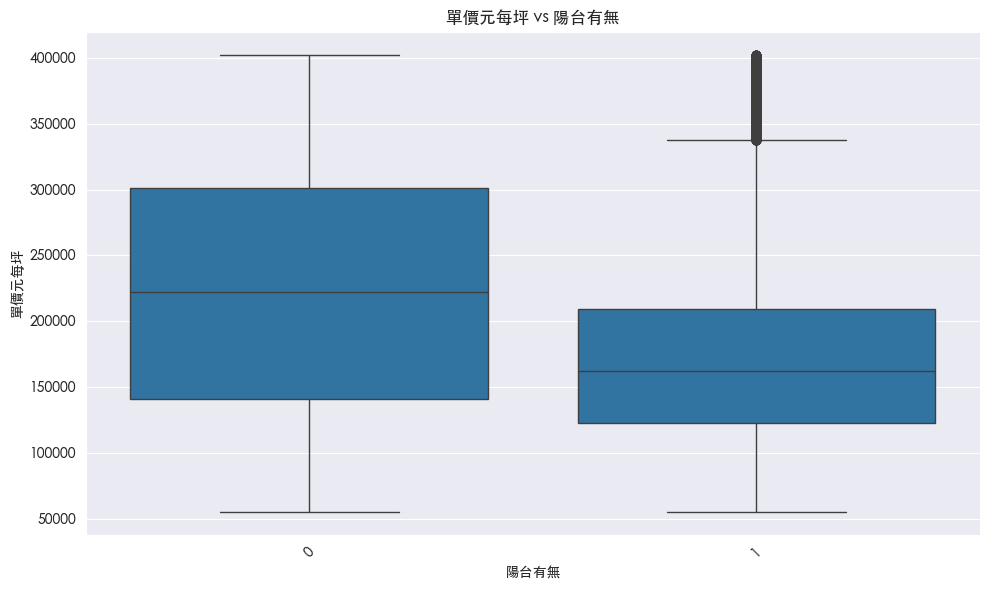

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 定義需要比較的分類變數
categorical_vars = [
    '建築型態', '土地用途','建材種類','移轉層次','屋齡區間','有無管理組織', '有無電梯', '是否包含車位', '是否含額外土地','陽台有無'
]

output_path = "/Users/debbie/house/output/"

# 遍歷每個分類變數，繪製對應的 Boxplot
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=var, y='單價元每坪')
    plt.title(f'單價元每坪 vs {var}')
    plt.xlabel(var)
    plt.ylabel('單價元每坪')
    plt.xticks(rotation=45)  # 如果分類變數有多個類別，可以選擇旋轉 x 軸標籤
    plt.tight_layout()
    
        # 儲存圖檔，先儲存再顯示
    plt.savefig(f"{output_path}out-specilDeal-5-percent-outlier_{var}_regplot.png", dpi=300)
    plt.show()
    plt.close()  # 關閉圖形以避免記憶體佔用
    



In [20]:
value = df['建材種類'].unique()
value

array(['鋼筋', '磚石', '鋼骨', '竹木', '未知'], dtype=object)

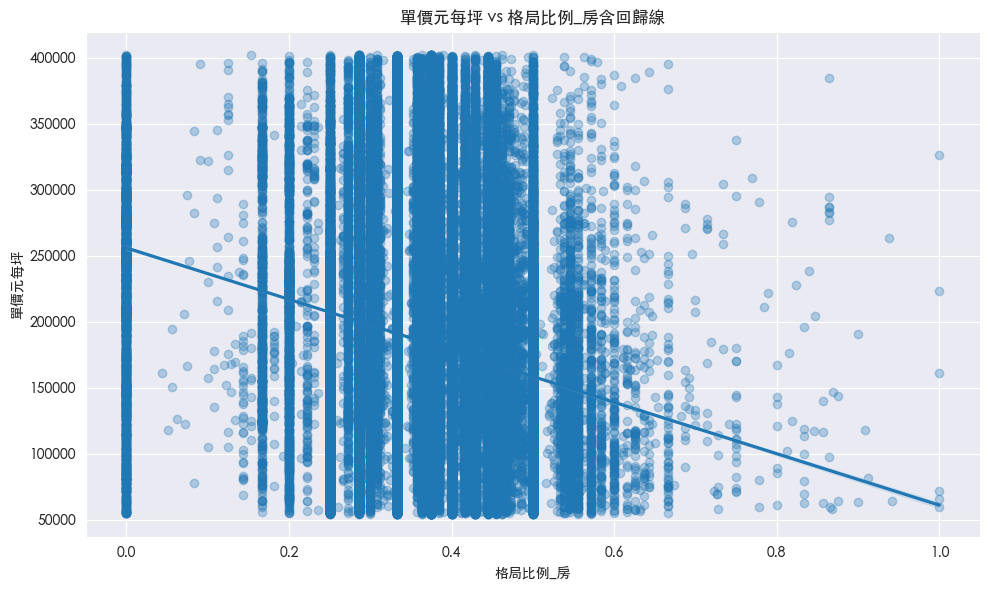

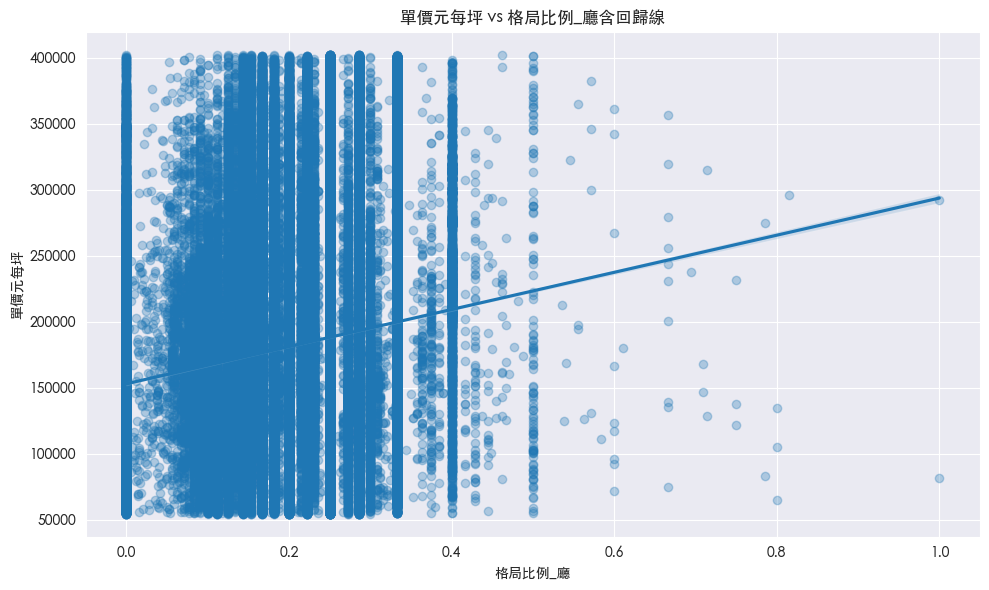

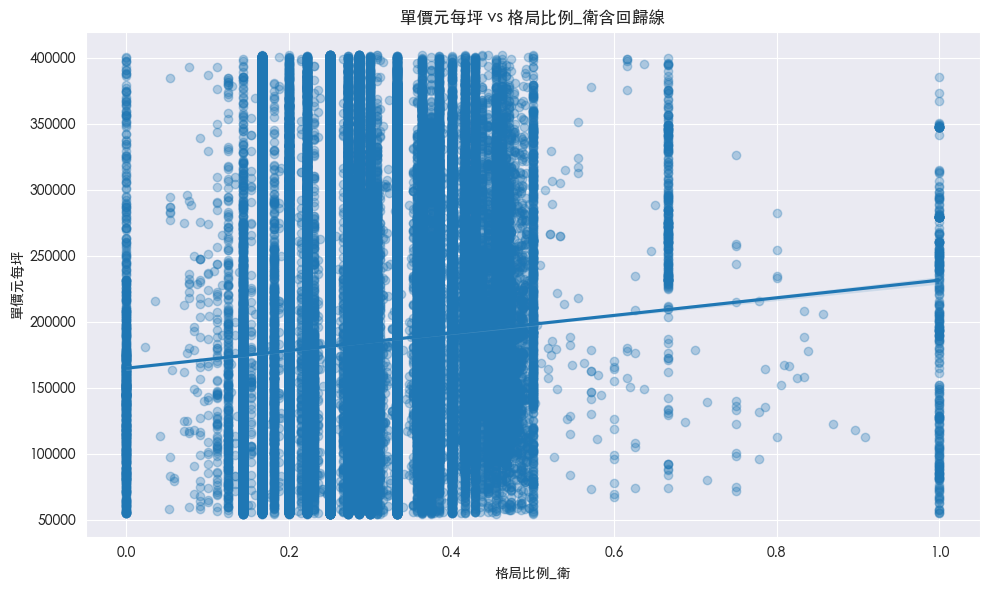

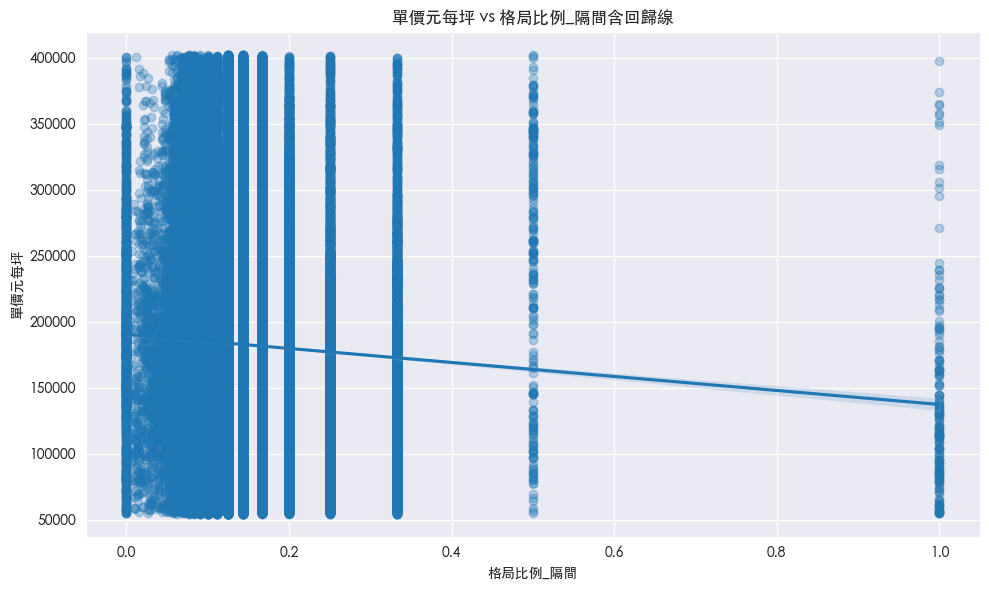

In [15]:

# 定义需要绘制的数值变量
numerical_vars = ['格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間']

# # 数据类型转换
# df[numerical_vars] = df[numerical_vars].astype(float)
# df['單價元每坪'] = df['單價元每坪'].astype(float)

# # 删除缺失值
# df_clean = df.dropna(subset=numerical_vars + ['單價元每坪'])

# 遍历每个数值变量，绘制对应的回归图
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df, x=var, y='單價元每坪', scatter_kws={'alpha':0.3})
    plt.title(f'單價元每坪 vs {var}含回歸線')
    plt.xlabel(var)
    plt.ylabel('單價元每坪')
    plt.grid(True)
    plt.tight_layout()
        # 儲存圖檔，先儲存再顯示
    plt.savefig(f"{output_path}out-specilDeal-5-percent-outlier_{var}_regplot.png", dpi=300)
    plt.show()
    plt.close()  # 關閉圖形以避免記憶體佔用



In [17]:
yearly_avg_price = df.groupby('交易年份')['單價元每坪'].mean().reset_index()
yearly_avg_price 

,交易年份,單價元每坪
0,2012,118239.291254
1,2013,124878.741216
2,2014,137658.562112
3,2015,141899.599269
4,2016,146184.095029
5,2017,152430.754998
6,2018,158929.286376
7,2019,167392.908857
8,2020,186995.553129
9,2021,208057.433661


1. 過濾極端值： 可以在繪圖之前過濾掉一些過高或過低的個別交易價格，比如使用百分位數過濾。

2. 調整y軸縮放： 在 plt.yscale('log') 中使用對數尺度，以便更直觀地觀察數據變化。

3. 檢查平均值計算： 確認年度平均單價的計算方法，確保是基於合理範圍內的數據進行平均。

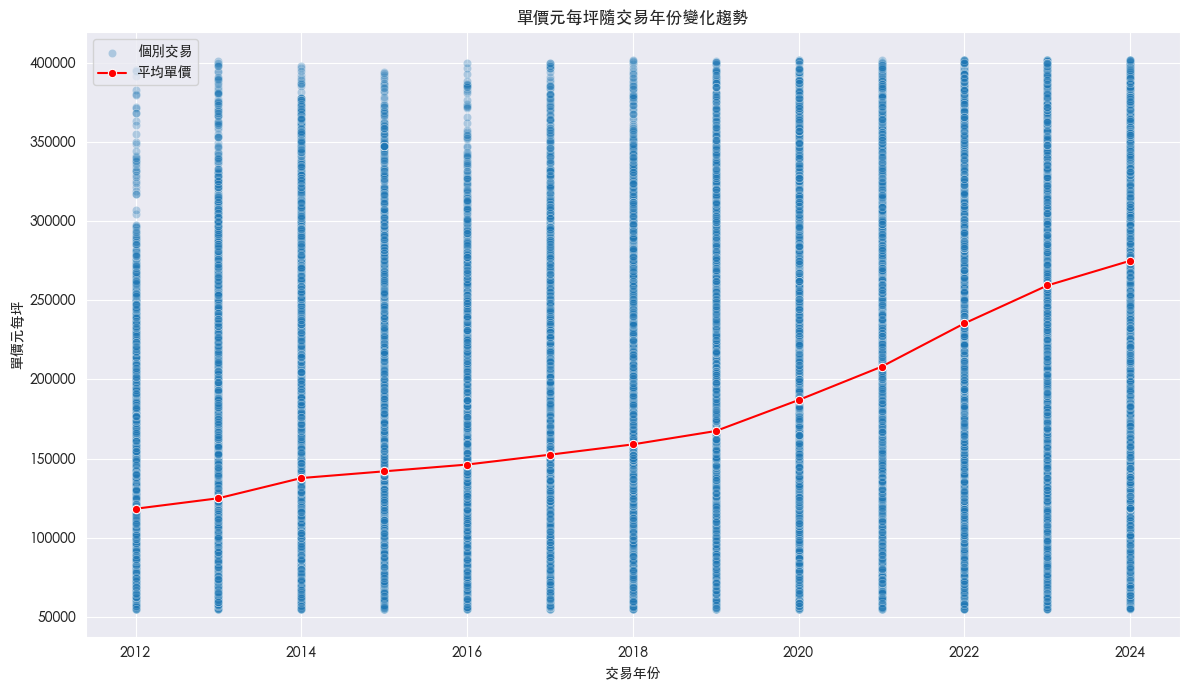

In [18]:
yearly_avg_price = df.groupby('交易年份')['單價元每坪'].mean().reset_index()
plt.figure(figsize=(12, 7))

# 绘制散点图
sns.scatterplot(data=df, x='交易年份', y='單價元每坪', alpha=0.3, label='個別交易')

# 绘制年度平均单价的折线图
sns.lineplot(data=yearly_avg_price, x='交易年份', y='單價元每坪', marker='o', color='red', label='平均單價')

plt.title('單價元每坪隨交易年份變化趨勢')
plt.xlabel('交易年份')
plt.ylabel('單價元每坪')
plt.legend()
plt.grid(True)
plt.tight_layout()

# 儲存圖檔，指定輸出路徑和檔名
output_path = "/Users/debbie/house/output/out-specilDeal-5-percent-outlier_yearly_avg_price_trend.png"
plt.savefig(output_path, dpi=300)

plt.show()


<!-- # count_vars = [
#     'good_count_0_500', 'good_count_500_1000', 'good_count_1000_1500',
#     'bad_count_0_500', 'bad_count_500_1000', 'bad_count_1000_1500'
# ]


# for var in count_vars:
#     plt.figure(figsize=(10, 6))
#     sns.kdeplot(
#         data=df,
#         x=var,
#         y='單價元每坪',
#         cmap="Blues",
#         shade=True,
#         thresh=0.05
#     )
#     plt.title(f'單價元每坪 vs {var}（核密度图）')
#     plt.xlabel(var)
#     plt.ylabel('單價元每坪')
#     plt.tight_layout()
#     plt.show() -->

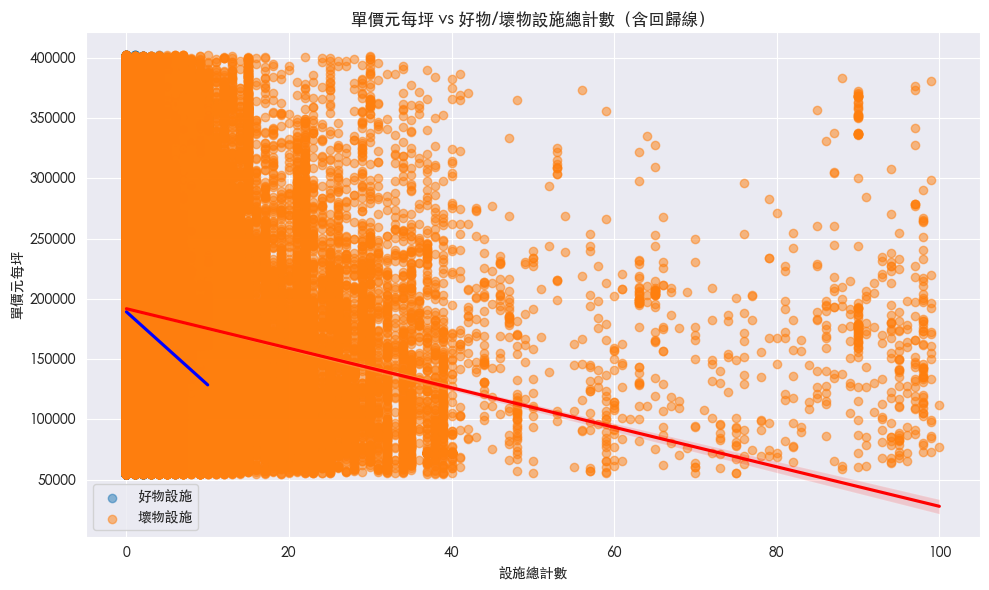

In [24]:

# 绘制散点图和回归线
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='good_count',
    y='單價元每坪',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'blue'},
    label='好物設施'
)
sns.regplot(
    data=df,
    x='bad_count',
    y='單價元每坪',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'},
    label='壞物設施'
)
plt.title('單價元每坪 vs 好物/壞物設施總計數（含回歸線）')
plt.xlabel('設施總計數')
plt.ylabel('單價元每坪')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

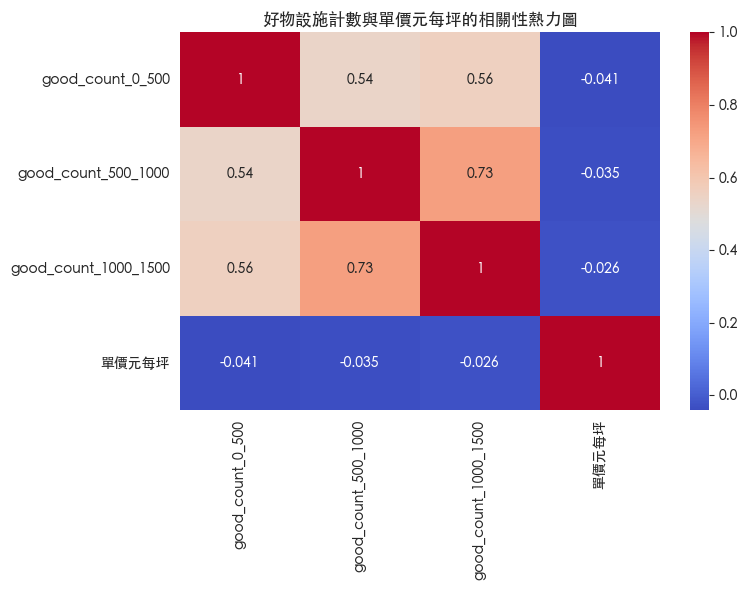

In [25]:
# 选择需要绘制的变量
heatmap_vars = ['good_count_0_500', 'good_count_500_1000', 'good_count_1000_1500', '單價元每坪']

# 计算相关性矩阵
corr = df[heatmap_vars].corr()

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('好物設施計數與單價元每坪的相關性熱力圖')
plt.tight_layout()
plt.show()

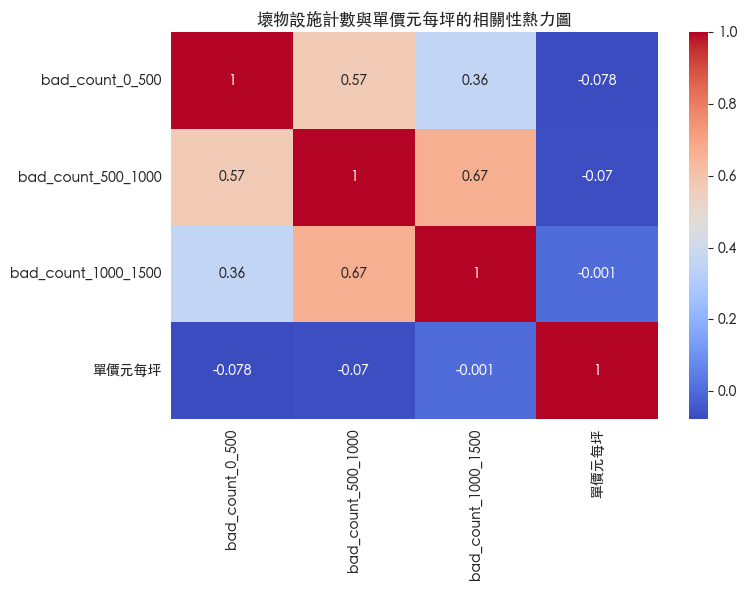

In [26]:
# 选择需要绘制的变量
heatmap_vars = ['bad_count_0_500', 'bad_count_500_1000', 'bad_count_1000_1500', '單價元每坪']

# 计算相关性矩阵
corr = df[heatmap_vars].corr()

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('壞物設施計數與單價元每坪的相關性熱力圖')
plt.tight_layout()
plt.show()

In [27]:
df.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '緯度', '經度', 'bad_count', 'good_count', '建築型態清整',
       '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
       '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石',
       '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓', '移轉層次_屋頂',
       '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯', 'Region',
       '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)', '交易年份', '建築完成年', '交易年_民國', '屋齡',
       '屋齡區間', 'good_count_0_500', 'good_count_500_1000',
       'good_count_1000_1500', 'bad_count_0_500', 'bad_count_500_1000',
       'bad_count_1000_1500', '比例總和', '移轉層次', '建築型態', '建材種類', '土地用途'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240065 entries, 0 to 240064
Data columns (total 62 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   鄉鎮市區                  240065 non-null  object 
 1   土地位置建物門牌              240065 non-null  object 
 2   交易年月日                 240065 non-null  object 
 3   建築完成年月                209777 non-null  float64
 4   建物移轉總面積平方公尺           240065 non-null  float64
 5   有無管理組織                240065 non-null  int64  
 6   總價元                   240065 non-null  int64  
 7   單價元平方公尺               240065 non-null  float64
 8   備註                    62036 non-null   object 
 9   編號                    240065 non-null  object 
 10  緯度                    240065 non-null  float64
 11  經度                    240065 non-null  float64
 12  bad_count             240065 non-null  float64
 13  good_count            240065 non-null  float64
 14  建築型態清整                240065 non-null  object 
 15  

## Lasso 和 Ridge 回歸：
- 需要特徵縮放：這兩種回歸方法對變數的尺度敏感，因為正則化項會受到特徵值大小的影響。特徵縮放有助於模型更快收斂，並確保正則化項對各變數的影響一致。
- 需要對類別型變數進行編碼：一般使用 One-Hot Encoding，並避免對編碼後的變數進行標準化。
- 需要處理缺失值：這些模型不能接受缺失值，需要在建模前對缺失值進行填補或刪除。


In [29]:
from sklearn.preprocessing import StandardScaler
# 定義目標變數 y
y = df['單價元每坪']

# 定義特徵變數 X，排除目標變數和不必要的欄位
X = df.drop(columns=['單價元每坪', '編號', '備註', '鄉鎮市區', '土地位置建物門牌', '交易年月日',
                     '建築完成年月', '建物移轉總面積平方公尺', 'Region', '緯度', '經度','單價元平方公尺','總價元',
                     '建築型態清整', '房地總價元', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km',
                     'Region', '交易年_民國', '移轉層次', '建築型態', '建材種類', '土地用途','屋齡區間'])

# 移除包含缺失值的列
X = X.dropna()
y = y.loc[X.index]  # 確保 y 與 X 的索引對齊

# 如果有類別型變數需要處理，請在此處進行 One-Hot Encoding（依照之前的步驟）

# 劃分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

# 列出數值型變數
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# 找出需要標準化的連續型變數（取值不只有 0 和 1）
continuous_cols = [col for col in numeric_cols if X[col].nunique() > 2]

# 初始化標準化器
scaler = StandardScaler()

# 在訓練集上擬合並轉換
X_train_scaled_continuous = scaler.fit_transform(X_train[continuous_cols])

# 在測試集上轉換
X_test_scaled_continuous = scaler.transform(X_test[continuous_cols])

# 將縮放後的資料轉換為 DataFrame
X_train_scaled_continuous = pd.DataFrame(X_train_scaled_continuous, columns=continuous_cols, index=X_train.index)
X_test_scaled_continuous = pd.DataFrame(X_test_scaled_continuous, columns=continuous_cols, index=X_test.index)

# 從原始資料中移除連續型變數，保留類別型變數（包括 One-Hot 編碼的變數）
X_train_categorical = X_train.drop(columns=continuous_cols)
X_test_categorical = X_test.drop(columns=continuous_cols)

# 合併標準化後的連續型變數和未經標準化的類別型變數
X_train_scaled = pd.concat([X_train_scaled_continuous, X_train_categorical], axis=1)
X_test_scaled = pd.concat([X_test_scaled_continuous, X_test_categorical], axis=1)

# 現在可以使用 X_train_scaled 和 y_train 進行模型訓練


In [30]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

# 初始化模型
lasso = Lasso(alpha=1.0)
ridge = Ridge(alpha=1.0)

# 訓練模型
lasso.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)

# 預測
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)

# 評估模型
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Lasso 回歸的均方誤差：{mse_lasso}")
print(f"Ridge 回歸的均方誤差：{mse_ridge}")


Lasso 回歸的均方誤差：2428591333.9061747
Ridge 回歸的均方誤差：2428662947.908243


In [31]:
from sklearn.model_selection import GridSearchCV

# 使用 GridSearchCV 來尋找最佳的 alpha 值
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print(f"最佳的 alpha: {grid_search.best_params_['alpha']}")
print(f"最佳模型的 R2_score (train): {grid_search.best_score_}")

# 使用最佳參數重新訓練模型
best_alpha = grid_search.best_params_['alpha']
ridgeReg = Ridge(alpha=best_alpha)
ridgeReg.fit(X_train, y_train)


最佳的 alpha: 0.01
最佳模型的 R2_score (train): 0.5947099265888489


Ridge(alpha=0.01)

In [32]:
# 實例化 Ridge 模型，這裡的 alpha 是正則化強度，可以根據需要調整
ridgeReg = Ridge(alpha=0.01)

# 訓練 Ridge 模型
ridgeReg.fit(X_train, y_train)


Ridge(alpha=0.01)

In [33]:
# 預測訓練集和測試集
y_pred_ridge_train = ridgeReg.predict(X_train)
y_pred_ridge_test = ridgeReg.predict(X_test)
# 計算 R2（決定係數）和 RMSE（均方根誤差）
r2_score_ridge_train = ridgeReg.score(X_train, y_train)
r2_score_ridge_test = ridgeReg.score(X_test, y_test)

rmse_ridge_train = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))

# 打印結果
print(f"R2_score (train): {r2_score_ridge_train}")
print(f"R2_score (test): {r2_score_ridge_test}")
print(f"RMSE (train): {rmse_ridge_train}")
print(f"RMSE (test): {rmse_ridge_test}")


R2_score (train): 0.6105331785426846
R2_score (test): 0.598072137199579
RMSE (train): 48377.75584776125
RMSE (test): 49281.58123254594


## LinearRegression

In [34]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [35]:
from sklearn.metrics import r2_score

# R2 score，即決定係數，反映Y的全部變異能通過迴歸關係被所有X解釋的比例。
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# RMSE一般指均方根誤差(標準誤差)，可衡量預測值和實際值之間的平均差異，藉此估計預測模型預測目標值的準確度
rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred_linear_train)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))

print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_train)
print("RMSE: ", rmse_test)

R2_score (train):  0.610533178545311
R2_score (test):  0.5980721042077624
RMSE:  48377.75584759812
RMSE:  49281.58325515871


## 隨機森林
- 不需要特徵縮放：隨機森林是基於決策樹的模型，決策樹通過對特徵進行分割來做決策，對變數的尺度不敏感。因此，對數值型變數進行標準化或歸一化通常不是必須的。
- 可以直接處理類別型變數：如果使用能夠處理類別型變數的實現（如某些 Python 的隨機森林套件），可以直接使用 Label Encoding。
- One-Hot Encoding 的影響：雖然隨機森林可以處理 One-Hot 編碼的變數，但過多的 One-Hot 編碼變數可能會增加模型的複雜度，影響性能。
可以部分處理缺失值：某些隨機森林實現可以處理缺失值，但為了提高模型性能，建議仍然對缺失值進行處理。

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240065 entries, 0 to 240064
Data columns (total 62 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   鄉鎮市區                  240065 non-null  object 
 1   土地位置建物門牌              240065 non-null  object 
 2   交易年月日                 240065 non-null  object 
 3   建築完成年月                209777 non-null  float64
 4   建物移轉總面積平方公尺           240065 non-null  float64
 5   有無管理組織                240065 non-null  int64  
 6   總價元                   240065 non-null  int64  
 7   單價元平方公尺               240065 non-null  float64
 8   備註                    62036 non-null   object 
 9   編號                    240065 non-null  object 
 10  緯度                    240065 non-null  float64
 11  經度                    240065 non-null  float64
 12  bad_count             240065 non-null  float64
 13  good_count            240065 non-null  float64
 14  建築型態清整                240065 non-null  object 
 15  

In [37]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
# 定義目標變數 y
y = df['單價元每坪']

# 定義要移除的欄位
columns_to_drop = [
    '單價元每坪', '編號', '備註', '鄉鎮市區', '土地位置建物門牌', '交易年月日',
    '建築完成年月', '建物移轉總面積平方公尺', 'Region', '緯度', '經度',
    '建築型態清整', '房地總價元', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km',
    '交易年_民國', '單價元平方公尺','總價元',
    # 已經 One-Hot 編碼且類別型態為 object 的欄位
    '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
    '建材_磚石', '建材_鋼筋', '建材_鋼骨', '建材_竹木',
    '住', '商', '工', '農',
    '移轉層次_騎樓', '移轉層次_屋頂', '移轉層次_一二樓', '屋齡'
]

# 定義特徵變數 X，移除目標變數和不必要的欄位
X = df.drop(columns=columns_to_drop)

# # 檢查缺失值
# print("缺失值統計：")
# print(X.isnull().sum())

# 移除包含缺失值的列
X = X.dropna()
y = y.loc[X.index]  # 確保 y 與 X 的索引對齊

# 找出類別型變數
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print("需要處理的類別型變數：", categorical_cols)

# 分離低基數和高基數的類別型變數
low_cardinality_cols = [col for col in categorical_cols if X[col].nunique() < 10]
high_cardinality_cols = [col for col in categorical_cols if X[col].nunique() >= 10]

print("低基數的類別型變數（使用 One-Hot Encoding）：", low_cardinality_cols)
print("高基數的類別型變數（使用 Label Encoding）：", high_cardinality_cols)

# 對低基數的類別型變數進行 One-Hot Encoding
X = pd.get_dummies(X, columns=low_cardinality_cols)

# 初始化 Label Encoder
label_encoder = LabelEncoder()

# 對高基數的類別型變數進行 Label Encoding
for col in high_cardinality_cols:
    X[col] = label_encoder.fit_transform(X[col])

# 劃分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

# 初始化隨機森林模型
rf = RandomForestRegressor(n_estimators=100, random_state=25)

# 訓練模型
rf.fit(X_train, y_train)

# 預測
y_pred = rf.predict(X_test)

# 評估模型性能
mse = mean_squared_error(y_test, y_pred)
print(f"隨機森林模型的均方誤差（MSE）：{mse}")


需要處理的類別型變數： ['屋齡區間', '移轉層次', '建築型態', '建材種類', '土地用途']
低基數的類別型變數（使用 One-Hot Encoding）： ['屋齡區間', '移轉層次', '建築型態', '建材種類', '土地用途']
高基數的類別型變數（使用 Label Encoding）： []
隨機森林模型的均方誤差（MSE）：6242591.085882373


Feature importance ranking
特徵重要性：
房地總價元(坪)                5.885927e-01
建物移轉總面積坪                2.631841e-01
交易年份                    1.145743e-01
建築完成年                   2.633885e-02
格局比例_隔間                 5.603429e-03
建材種類_未知                 3.910596e-04
bad_count_1000_1500     1.486945e-04
建築型態_住商大樓               1.198174e-04
格局比例_房                  9.842463e-05
bad_count_500_1000      9.139037e-05
格局比例_廳                  8.440917e-05
格局比例_衛                  7.757436e-05
good_count_1000_1500    6.492314e-05
good_count_500_1000     6.153096e-05
bad_count_0_500         5.873397e-05
建材種類_鋼筋                 5.716355e-05
bad_count               5.196899e-05
good_count              3.525644e-05
屋齡區間_3年以上－未滿12年         3.304550e-05
good_count_0_500        2.922400e-05
建築型態_其他                 2.853661e-05
比例總和                    2.791660e-05
建材種類_鋼骨                 2.300262e-05
是否含額外土地                 2.299751e-05
土地用途_住                  1.795695e-05
土地用途_工                  1.730262e-05
陽台有無

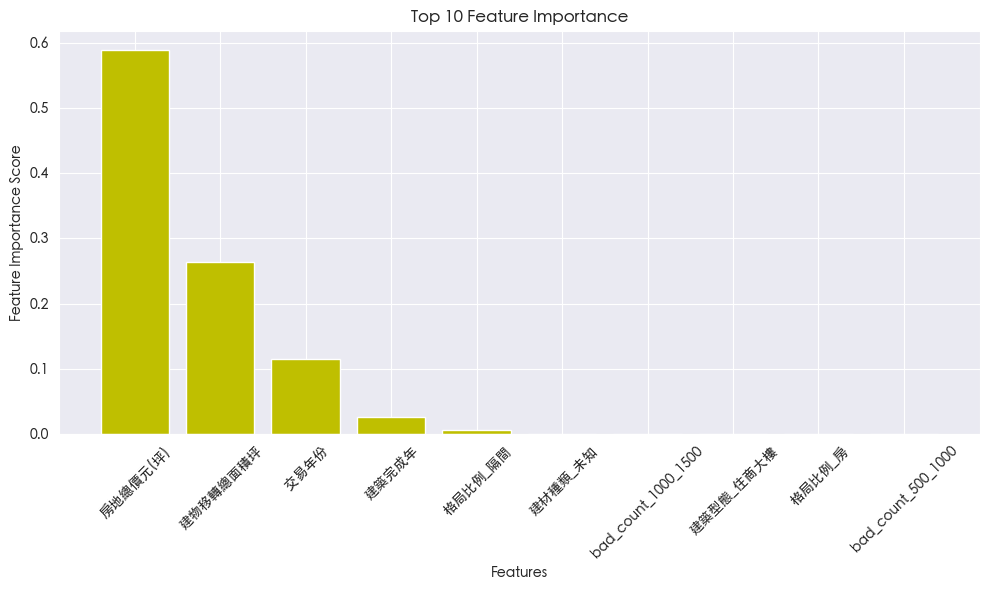

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# 確保已經訓練了隨機森林模型 rf

print('Feature importance ranking')

# 獲取特徵重要性
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# 按重要性排序
feature_importances.sort_values(ascending=False, inplace=True)

print("特徵重要性：")
print(feature_importances)

# 取出前 10 個特徵及其重要性
top_n = 10
top_features = feature_importances.index[:top_n]
top_importances = feature_importances.values[:top_n]

# 繪製前 10 個特徵的重要性圖
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importance')
plt.bar(top_features, top_importances, color='y', align='center')
plt.xticks(rotation=45)
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.tight_layout()
plt.show()


In [39]:
from sklearn.metrics import mean_squared_error, r2_score

# 預測與評估
y_pred_rf_train = rf.predict(X_train)
y_pred_rf_test = rf.predict(X_test)

# 計算 R^2 分數
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# 計算 RMSE
rmse_rf_train = np.sqrt(mean_squared_error(y_train, y_pred_rf_train))
rmse_rf_test = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))

# 輸出結果
print(f"R2_score (train): {r2_score_rf_train}")
print(f"R2_score (test): {r2_score_rf_test}")
print(f"RMSE (train): {rmse_rf_train}")
print(f"RMSE (test): {rmse_rf_test}")


R2_score (train): 0.9998202406438297
R2_score (test): 0.9989668967360501
RMSE (train): 1039.336638611718
RMSE (test): 2498.5177777799327


以下特征在 df 中不存在，将从 X 中添加： ['土地用途_農', '屋齡區間_3年以上－未滿12年', '土地用途_工', '建材種類_未知', '移轉層次_未知', '建材種類_鋼骨', '建材種類_磚石', '屋齡區間_12年以上－未滿21年', '土地用途_住', '土地用途_未知', '屋齡區間_未滿3年', '屋齡區間_30年以上', '建材種類_鋼筋', '土地用途_商', '建材種類_竹木', '屋齡區間_21年以上－未滿30年']
选取的前 10 个特征： ['有無管理組織', 'bad_count', 'good_count', '陽台有無', '是否含額外土地', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位']
所有特征都已存在于 df 中。


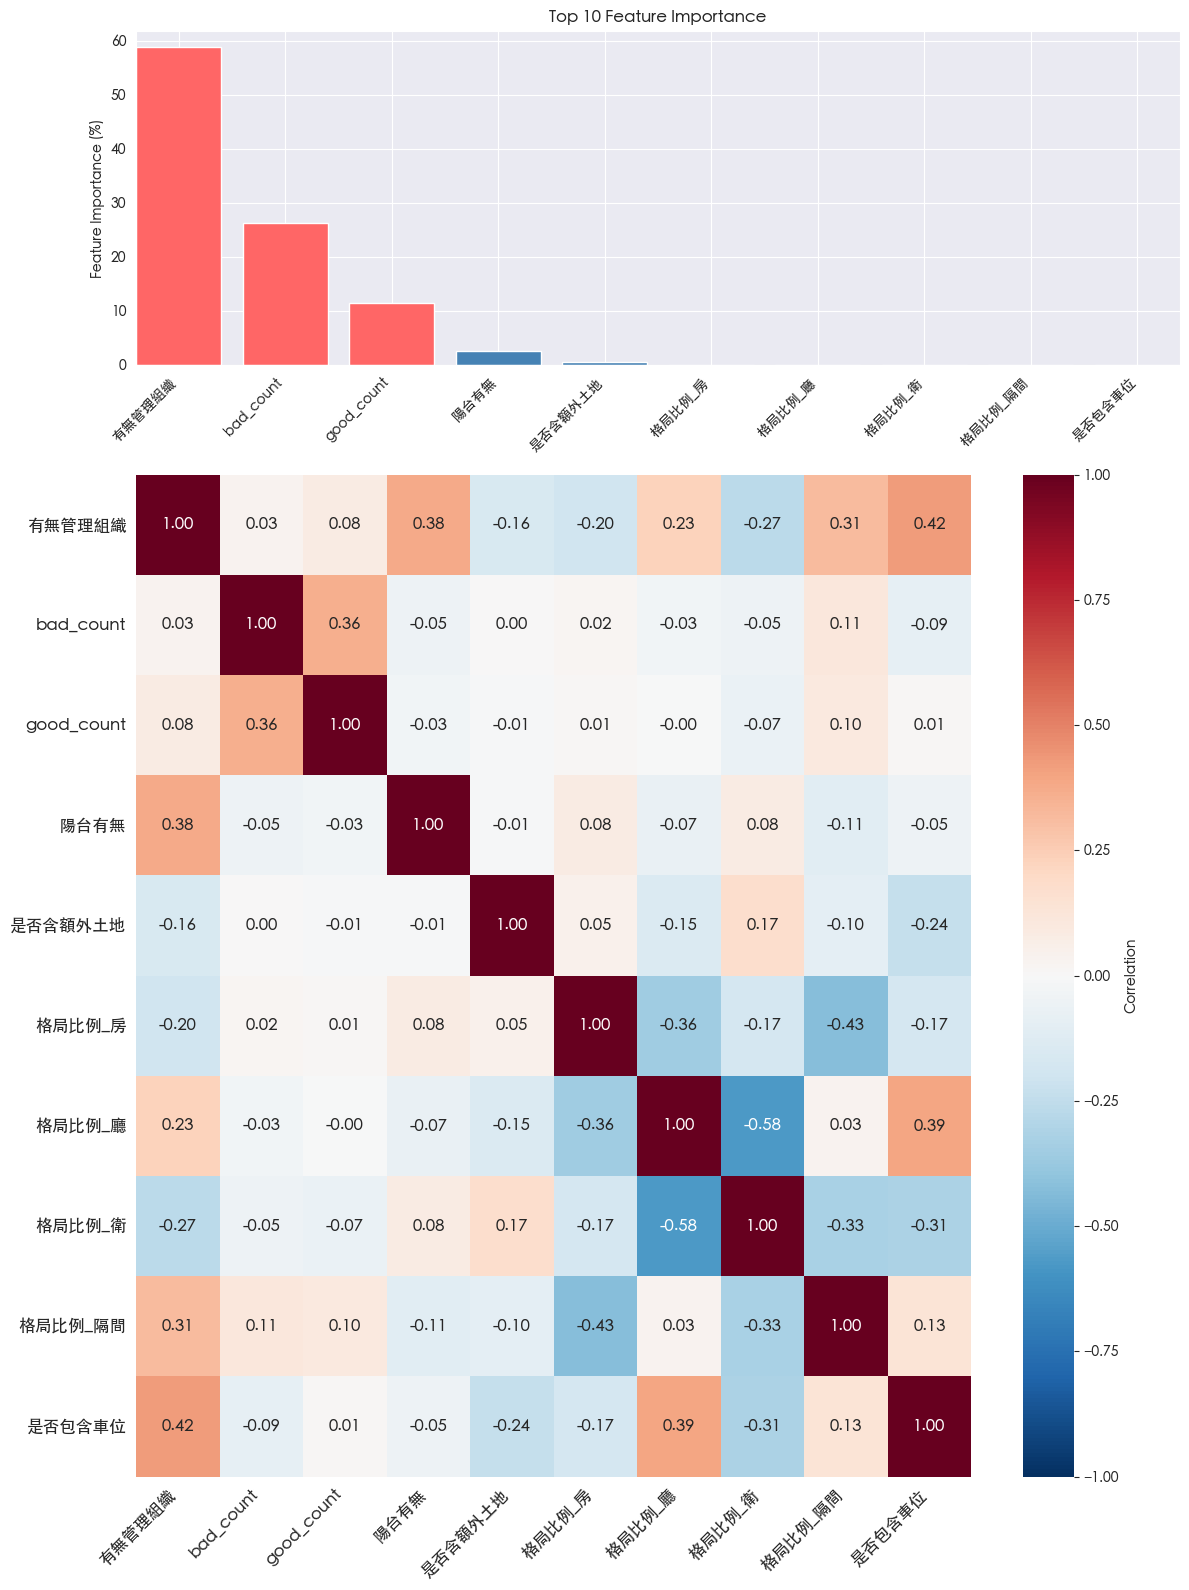

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设您已经有 df、X、feature_importances 这些变量

# 1. 更新 selected_features
selected_features = [
    '房地總價元(坪)', '建物移轉總面積坪', '陽台有無', '交易年份', 'bad_count_500_1000',
    '格局比例_衛', 'bad_count_1000_1500', '土地用途_農', '建築完成年', 'bad_count',
    'good_count_1000_1500', 'bad_count_0_500', '建築型態_其他', '移轉層次_一二樓',
    '格局比例_房', 'good_count_500_1000', '格局比例_廳', '屋齡區間_3年以上－未滿12年',
    '土地用途_工', '格局比例_隔間', '建材種類_未知', '移轉層次_未知', 'good_count_0_500',
    '建材種類_鋼骨', '建築型態_透天厝', '是否含額外土地', 'good_count', '建材種類_磚石',
    '屋齡區間_12年以上－未滿21年', '土地用途_住', '土地用途_未知', '屋齡區間_未滿3年',
    '屋齡區間_30年以上', '建材種類_鋼筋', '土地用途_商', '是否包含車位',
    '建材種類_竹木', '屋齡區間_21年以上－未滿30年', '有無電梯', '有無管理組織',
    '移轉層次_騎樓', '建築型態_住商大樓', '建築型態_公寓', '移轉層次_屋頂'
]

# 2. 确保 df 包含所有 selected_features
missing_features = [feature for feature in selected_features if feature not in df.columns and feature in X.columns]
if missing_features:
    print("以下特征在 df 中不存在，将从 X 中添加：", missing_features)
    df = df.join(X[missing_features], how='left')
else:
    print("所有特征都已存在于 df 中。")

# 检查是否还有缺失的特征
still_missing = [feature for feature in selected_features if feature not in df.columns]
if still_missing:
    print("以下特征在 df 和 X 中均不存在，可能需要检查数据处理流程：", still_missing)

# 3. 计算相关性矩阵
correlation_matrix = df[selected_features].corr()

features = X.columns
importance = feature_importances * 100  # 将特征重要性百分比化

# 排序特征和重要性
sorted_idx = np.argsort(importance)[::-1]  # 降序排列
sorted_features = features[sorted_idx]
sorted_importance = importance[sorted_idx]

# 选择前 10 个特征
top_n = 10
sorted_features_top_n = sorted_features[:top_n]
sorted_importance_top_n = sorted_importance[:top_n]

# 更新 selected_features
selected_features = list(sorted_features_top_n)
print("选取的前 10 个特征：", selected_features)

# 2. 确保 df 包含所有 selected_features
missing_features = [feature for feature in selected_features if feature not in df.columns]
if missing_features:
    print("以下特征在 df 中不存在，将从 X 中添加：", missing_features)
    df = df.join(X[missing_features], how='left')
else:
    print("所有特征都已存在于 df 中。")

# 检查是否还有缺失的特征
still_missing = [feature for feature in selected_features if feature not in df.columns]
if still_missing:
    print("以下特征在 df 和 X 中均不存在，可能需要检查数据处理流程：", still_missing)

# 3. 计算相关性矩阵
correlation_matrix = df[selected_features].corr()

# 4. 绘制特征重要性和相关性矩阵
fig, (ax_bar, ax_heatmap) = plt.subplots(
    2, 1, gridspec_kw={"height_ratios": [1, 3]}, figsize=(12, 16)
)

# 设置颜色，强调前三名特征
colors = ['steelblue'] * len(sorted_importance_top_n)
colors[:3] = ['#ff6666', '#ff6666', '#ff6666']  # 强调前三名特征

# 绘制特征重要性柱状图
ax_bar.bar(range(len(sorted_importance_top_n)), sorted_importance_top_n, color=colors)
ax_bar.set_ylabel("Feature Importance (%)")
ax_bar.set_xticks(range(len(sorted_features_top_n)))
ax_bar.set_xticklabels(sorted_features_top_n, rotation=45, ha='right')
ax_bar.set_title('Top 10 Feature Importance')

# 调整柱状图布局
ax_bar.margins(x=0)

# 绘制相关性矩阵热图
sns.heatmap(
    correlation_matrix, annot=True, fmt=".2f", cmap="RdBu_r", center=0,
    ax=ax_heatmap, cbar_kws={'label': 'Correlation'}, vmin=-1, vmax=1,
    xticklabels=selected_features, yticklabels=selected_features, annot_kws={"size": 12}
)

# 旋转 x 轴和 y 轴标签
ax_heatmap.set_xticklabels(ax_heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax_heatmap.set_yticklabels(ax_heatmap.get_yticklabels(), rotation=0, fontsize=12)

# 调整布局
plt.tight_layout()
plt.show()


In [41]:
df.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '緯度', '經度', 'bad_count', 'good_count', '建築型態清整',
       '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
       '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石',
       '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓', '移轉層次_屋頂',
       '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯', 'Region',
       '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)', '交易年份', '建築完成年', '交易年_民國', '屋齡',
       '屋齡區間', 'good_count_0_500', 'good_count_500_1000',
       'good_count_1000_1500', 'bad_count_0_500', 'bad_count_500_1000',
       'bad_count_1000_1500', '比例總和', '移轉層次', '建築型態', '建材種類', '土地用途', '土地用途_農',
       '屋齡區間_3年以上－未滿12年', '土地用途_工', '建材種類_未知', '移轉層次_未知', '建材種類_鋼骨', '建材種類_磚石',
       '屋齡區間_12年以上－未滿21年', '土地用途_住', '土地用途_未知', '屋齡區間_未滿3年', '屋齡區間_30年以上',
       '建材種類_鋼筋', '土地用途_商', '建材種類_竹木', '屋齡區間_21年以上－未滿30年'],
      dtype='object')

In [42]:
import statsmodels.api as sm
from scipy import stats

### 找到 VIF（變異數膨脹因子） 大於 10 的變數後，下一步就是處理這些存在 <u>多重共線性</u> 問題的變數，以提高模型的穩定性和預測性能
VIF 大於 10：通常認為該變數與其他自變數存在較強的線性關係，可能導致多重共線性問題。
多重共線性的影響：
- 模型係數不穩定：回歸係數的標準誤可能會很大，導致係數估計不穩定。
- 解釋困難：難以確定哪個變數真正影響了目標變數。
- 預測能力下降：模型可能對新數據的預測效果較差。

## Ordinal

In [43]:
import pandas as pd


# 1. 定义类别的顺序映射
age_mapping = {
    '未滿3年': 0,
    '3年以上－未滿12年': 1,
    '12年以上－未滿21年': 2,
    '21年以上－未滿30年': 3,
    '30年以上': 4
}

# 2. 应用映射，将 '屋齡區間' 转换为数值型变量
df['屋齡區間_數值'] = df['屋齡區間'].map(age_mapping)

# 3. 检查转换结果
print(df[['屋齡區間', '屋齡區間_數值']].head())


          屋齡區間  屋齡區間_數值
0  21年以上－未滿30年        3
1        30年以上        4
2  21年以上－未滿30年        3
3  21年以上－未滿30年        3
4  21年以上－未滿30年        3


In [44]:
features = [
    # 分类变量（已删除一个基准类别）
    '建築型態_住商大樓', '建築型態_公寓','建築型態_透天厝',
    '建材_磚石', '建材_鋼筋', '建材_鋼骨',
    '住', '商', '工',
    '移轉層次_騎樓', '移轉層次_一二樓',
    # 格局比例（以刪除三個變量）
    '格局比例_廳',
    # 有无变量
     '有無管理組織','陽台有無', '是否含額外土地',
    # 其他数值型变量
    '建物移轉總面積坪',
    # 好物设施（使用合并后的变量）
    'good_count', 'bad_count',
    '屋齡區間_數值'
    # 如果屋齡區間是分类变量，需进行编码后加入
]


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# 提取用于计算 VIF 的数据
X = df[features]
# print(X.dtypes)

# 例如，对于 '有無管理組織' 列
X['有無管理組織'] = X['有無管理組織'].map({'有': 1, '無': 0})


# 添加常数项（如果需要）
# X = sm.add_constant(X)

# 计算 VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

MissingDataError: exog contains inf or nans

In [99]:
print("VIF 结果：")
print(vif_data)

VIF 结果：
       feature       VIF
0    建築型態_住商大樓  7.873222
1      建築型態_公寓  1.514683
2     建築型態_透天厝  5.156898
3        建材_磚石  1.547055
4        建材_鋼筋  7.812535
5        建材_鋼骨  1.071541
6            住  6.948836
7            商  2.347395
8            工  1.147646
9      移轉層次_騎樓  1.168544
10    移轉層次_一二樓  1.360035
11      格局比例_廳  9.879404
12      有無管理組織  4.348892
13        陽台有無  6.009417
14     是否含額外土地  1.544926
15    建物移轉總面積坪  1.300831
16  good_count  1.742230
17   bad_count  1.929434
18     屋齡區間_數值  4.235008


In [100]:
# 1. 找出 VIF 大於 10 的變數
high_vif_features = vif_data[vif_data["VIF"] > 10]["feature"]
high_vif_features

# # 2. 刪除這些變數，並檢查是否存在
# for feature in high_vif_features:
#     if feature in df.columns:
#         df_vif = df.drop(columns=[feature])
#         print(f"已刪除變數: {feature}")
#     else:
#         print(f"變數不存在: {feature}")

# # 3. 重新檢查清理後的數據
# print("清理後的數據:")
# print(df_vif.head())


Series([], Name: feature, dtype: object)

分析相關性：

查看哪些變數之間的相關係數接近 1 或 -1，表示高度相關。
特別關注相關係數絕對值大於 0.8 或 0.9 的變數對。

- 建築型態_住商大樓 可能與 有無電梯 之間存在高度相關性，因為住商大樓通常都有電梯。
- 格局比例_房 可能與 建物移轉總面積坪 等變數相關，因為房間的比例可能隨著總面積變化

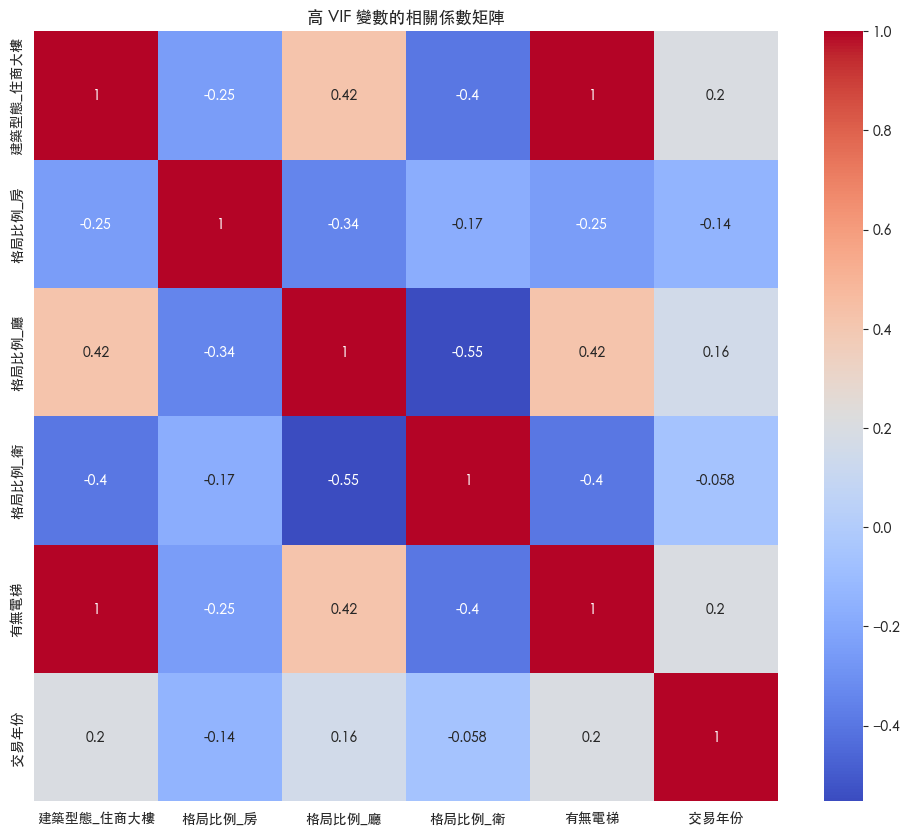

In [54]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 提取 VIF 大於 10 的變數列表
# high_vif_vars = vif_data[vif_data['VIF'] > 10]['feature'].tolist()

# # 計算相關係數矩陣
# corr_matrix = X[high_vif_vars].corr()

# # 繪製熱力圖
# plt.figure(figsize=(12, 10))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('高 VIF 變數的相關係數矩陣')
# plt.show()


In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# 調整圖形大小
plt.figure(figsize=(14, 10))

# 計算相關矩陣並繪製 heatmap
corr_matrix = X[[   
    '建築型態_住商大樓', '建築型態_公寓', '建築型態_透天厝',
    '建材_磚石', '建材_鋼筋', '建材_鋼骨',
    '住', '商', '工',
    '移轉層次_騎樓', '移轉層次_一二樓',
    '格局比例_房', '格局比例_廳',
    '有無管理組織', '陽台有無', '是否含額外土地', '是否包含車位',
    '建物移轉總面積坪',
    'good_count', 'bad_count',
    '屋齡區間_數值']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('格局比例_房 與其他變數的相關性', fontsize=16)
plt.tight_layout()  # 使圖形布局更緊湊
plt.show()



KeyError: "['格局比例_房', '是否包含車位'] not in index"

<Figure size 1400x1000 with 0 Axes>

主成分分析（PCA）：

降維：將原始變數轉換為一組線性不相關的主成分。
保留主要信息：通過選擇前幾個主成分，保留大部分數據的變異。

PCA（主成分分析）中的 explained_variance_ratio_ 表示每個主成分（Principal Component, PC）對原始數據總變異的解釋比例。這些數值有助於了解每個主成分的重要性。以下是對輸出結果的解釋：

變異解釋比例:

每個數值代表對應主成分所解釋的變異比例。比如，第一個主成分（PC1）解釋了 16.08% 的變異，第二個主成分（PC2）解釋了 11.28% 的變異，依此類推。
主成分的排序是根據其解釋變異的能力來排列的，因此第一個主成分解釋變異最多，隨後的解釋能力逐漸減弱。
累積解釋變異:

通常，我們會考慮前幾個主成分能夠解釋多少總變異來決定保留多少個主成分。累積解釋變異比例（cumulative explained variance ratio）可以幫助我們決定選取的主成分數目。
例如，前五個主成分的累積解釋變異比例為：
0.1608+0.1128+0.0909+0.0791+0.0724=0.516
這意味著，前五個主成分可以解釋約 51.6% 的原始數據變異。
選擇主成分的數量:

通常，選擇能夠解釋至少 80% 以上變異的主成分數目，這樣可以在保留足夠信息的同時大幅減少變數維度。你可以逐步累加 explained_variance_ratio_ 中的值，直到達到所需的解釋比例。
高 VIF 的變數降維:

在使用 PCA 進行降維後，原本具有高 VIF（方差膨脹因子）的變數之間的多重共線性問題會減少，因為 PCA 會將原始特徵轉換為線性不相關的主成分。這些主成分是新的特徵，能夠在保持主要變異的前提下，減少數據的複雜性。
應用場景:

如果你只希望保留主要信息並降低維度，可以根據這些解釋變異比例來選擇前幾個主成分來進行建模，而不是使用全部特徵。
總結來說，這些解釋變異比例幫助你了解每個主成分在數據降維中的作用，並決定選擇多少個主成分來達到最佳的數據簡化效果。



In [101]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# # 標準化數據
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # 實例化 PCA，對高 VIF 變數進行降維
# pca = PCA()
# X_pca = pca.fit_transform(X_scaled)

# # 查看主成分的解釋變異比例
# print(pca.explained_variance_ratio_)


[0.16076075 0.11276383 0.09088089 0.07910971 0.07238223 0.06179726
 0.05422889 0.04842936 0.04679434 0.04462771 0.04154758 0.03793786
 0.03457041 0.03206611 0.03118582 0.01800225 0.01374802 0.0126414
 0.00652555]


In [129]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# import numpy as np

# # 假設 X 已經定義，且是標準化前的特徵矩陣
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # 使用 PCA 擬合數據
# pca = PCA()
# pca.fit(X_scaled)

# # 計算累積解釋變異比例
# cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# # 找到達到 80% 變異解釋的最小主成分數量
# n_components_80 = np.argmax(cumulative_variance >= 0.8) + 1  # 加 1 是因為索引從 0 開始

# # print(f"達到 80% 變異解釋的主成分數量: {n_components_80}")

# # 使用計算出的主成分數量重新進行 PCA 降維
# pca = PCA(n_components=n_components_80)
# X_pca = pca.fit_transform(X_scaled)

# # 將降維後的特徵存儲為 DataFrame
# X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components_80)])

# # 查看降維後的數據
# # print(X_pca_df.head())

# from sklearn.model_selection import train_test_split

# # 劃分訓練集和測試集
# X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.3, random_state=25)


In [104]:
# import pandas as pd
# import numpy as np
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# # 假設 X 是標準化前的原始數據 DataFrame
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # 實例化 PCA 並擬合數據
# pca = PCA()
# X_pca = pca.fit_transform(X_scaled)

# # 將 PCA 的 components_ 轉換為 DataFrame，更容易解讀
# # 列名是原始特徵名稱，行名是主成分名稱
# pca_components = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(len(X.columns))])

# # # 輸出主成分矩陣
# # print(pca_components)
# # 找出每個主成分對應貢獻最大的特徵
# top_features = pca_components.abs().idxmax(axis=1)
# print(top_features)


PC1     建築型態_住商大樓
PC2       屋齡區間_數值
PC3             住
PC4             工
PC5       移轉層次_騎樓
PC6       建築型態_公寓
PC7       建築型態_公寓
PC8      建物移轉總面積坪
PC9       是否含額外土地
PC10        建材_鋼骨
PC11            工
PC12       格局比例_廳
PC13        建材_磚石
PC14    bad_count
PC15     移轉層次_一二樓
PC16      屋齡區間_數值
PC17            商
PC18       有無管理組織
PC19    建築型態_住商大樓
dtype: object


In [106]:
# import pandas as pd
# import numpy as np
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import Ridge
# from sklearn.metrics import mean_squared_error, r2_score

# # 假設 X 和 y 已經定義
# # X 是原始特徵數據，y 是目標變數

# # 標準化特徵數據
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # 使用 PCA 進行降維
# pca = PCA(n_components=10)  # 這裡選擇 10 個主成分
# X_pca = pca.fit_transform(X_scaled)

# # 將 PCA 結果存儲為新的 DataFrame
# # 每個主成分作為一個新特徵
# X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# # 確認數據形狀
# print(X_pca_df.head())

# # 劃分訓練集和測試集
# X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.3, random_state=25)


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.477271  1.272469 -2.102514 -2.171213  0.051876  0.047406 -0.071232   
1 -3.082545  2.191534  0.562645 -0.919921  0.108807 -1.040831 -1.044353   
2 -1.753771  1.144672 -3.584168  2.783478 -1.649592 -2.763746  1.514445   
3 -2.587213  2.292277 -0.386552 -0.253952 -1.586112 -0.314356 -2.069989   
4 -3.056197  2.010560 -0.752357 -1.406634  1.227196 -1.789768 -0.552590   

        PC8       PC9      PC10  
0  0.578825 -0.560362  0.311934  
1  0.291252 -0.739102  0.022071  
2 -4.460565 -0.632500  4.228979  
3  0.701617 -0.350621  0.026204  
4 -1.614465  1.229043 -1.263428  


In [113]:
# # 計算每個原始特徵對目標變數的影響
# original_feature_influence = np.dot(ridgeReg.coef_, pca.components_)

# # 將影響轉換為 DataFrame 以便更容易解讀
# influence_df = pd.DataFrame({
#     'Feature': X.columns,
#     'Influence': original_feature_influence
# })

# # 排序以查看影響最大的特徵
# influence_df = influence_df.sort_values(by='Influence', ascending=False)
# print(influence_df)


       Feature     Influence
5        建材_鋼骨  13341.360354
8            工  11103.987070
11      格局比例_廳   8780.874291
18     屋齡區間_數值   5951.100091
14     是否含額外土地   4669.027472
0    建築型態_住商大樓   4235.092501
1      建築型態_公寓   3537.390239
10    移轉層次_一二樓   2335.695508
3        建材_磚石   1041.044959
7            商  -1677.128124
6            住  -2039.757881
12      有無管理組織  -4032.701356
15    建物移轉總面積坪  -5060.619420
2     建築型態_透天厝  -5284.598185
9      移轉層次_騎樓  -6162.181924
17   bad_count  -6944.483129
16  good_count  -7157.736516
4        建材_鋼筋 -10376.714185
13        陽台有無 -14298.979415
